In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

df = df[df["Trip_Price"].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       901 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        903 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              907 non-null    float64
 7   Per_Km_Rate            907 non-null    float64
 8   Per_Minute_Rate        902 non-null    float64
 9   Trip_Duration_Minutes  905 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


In [19]:
cat_cols = df.select_dtypes(include="object").columns

cat_cols

(Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
        'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
       dtype='object'),
 Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object'))

In [21]:
df = df.drop(columns=cat_cols)
df

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698
4,NaN,3.0,2.93,0.63,0.32,22.64,15.6180
5,8.64,2.0,2.55,1.71,0.48,89.33,60.2028
...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.49,58.39,34.4049
996,45.95,4.0,3.12,0.61,NaN,61.96,62.1295
997,7.70,3.0,2.08,1.78,NaN,54.18,33.1236
998,47.56,1.0,2.67,0.82,0.17,114.94,61.2090


In [7]:
# encoders = {}
# for col in cat_cols:
#     le = LabelEncoder()
#     # Hantera NaN genom att tillfälligt fylla med sträng "missing"
#     df[col] = df[col].astype(str).replace("nan", "missing")
#     df[col] = le.fit_transform(df[col])
#     encoders[col] = le
# encoders

{'Time_of_Day': LabelEncoder(),
 'Day_of_Week': LabelEncoder(),
 'Traffic_Conditions': LabelEncoder(),
 'Weather': LabelEncoder()}

In [22]:
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

c:\Users\organ\Repos\ai_ml\taxi-prediction-fullstack-pontus\.venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [26]:
df_imputed

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.3500,3.0,3.56,0.800,0.3200,53.82,36.2624
1,36.8700,1.0,2.70,1.210,0.1500,37.27,52.9032
2,30.3300,4.0,3.48,0.510,0.1500,116.81,36.4698
3,8.6332,3.0,2.93,0.630,0.3200,22.64,15.6180
4,8.6400,2.0,2.55,1.710,0.4800,89.33,60.2028
...,...,...,...,...,...,...,...
946,5.4900,4.0,2.39,0.620,0.4900,58.39,34.4049
947,45.9500,4.0,3.12,0.610,0.4077,61.96,62.1295
948,7.7000,3.0,2.08,1.780,0.3928,54.18,33.1236
949,47.5600,1.0,2.67,0.820,0.1700,114.94,61.2090


In [23]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Passenger_Count        951 non-null    float64
 2   Base_Fare              951 non-null    float64
 3   Per_Km_Rate            951 non-null    float64
 4   Per_Minute_Rate        951 non-null    float64
 5   Trip_Duration_Minutes  951 non-null    float64
 6   Trip_Price             951 non-null    float64
dtypes: float64(7)
memory usage: 52.1 KB


In [24]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,951.0,27.118034,19.826774,1.2300,12.70500,25.9200,38.69500,146.067047
Passenger_Count,951.0,2.477834,1.075165,1.0000,2.00000,2.2700,3.00000,4.000000
Base_Fare,951.0,3.494572,0.848798,2.0100,2.76000,3.5000,4.17000,5.000000
Per_Km_Rate,951.0,1.229525,0.425343,0.5000,0.86000,1.2200,1.59000,2.000000
Per_Minute_Rate,951.0,0.294134,0.113627,0.1000,0.19500,0.2900,0.39000,0.500000
Trip_Duration_Minutes,951.0,62.129606,31.806129,5.0100,36.33500,61.8056,88.26000,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [25]:
df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing_cleaned_no_categorical.csv", index_col=0)
df

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,3.0,3.56,0.80,0.320000,53.82,36.2624
2,36.87,1.0,2.70,1.21,0.150000,37.27,52.9032
3,30.33,4.0,3.48,0.51,0.150000,116.81,36.4698
4,25.83,3.0,2.93,0.63,0.320000,22.64,15.6180
5,8.64,2.0,2.55,1.71,0.480000,89.33,60.2028
...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.490000,58.39,34.4049
996,45.95,4.0,3.12,0.61,0.292916,61.96,62.1295
997,7.70,3.0,2.08,1.78,0.292916,54.18,33.1236
998,47.56,1.0,2.67,0.82,0.170000,114.94,61.2090


In [14]:
# for col in cat_cols:
#     df_imputed[col] = df_imputed[col].round().astype(int)
#     le = encoders[col]
#     df_imputed[col] = le.inverse_transform(df_imputed[col])

# df_imputed

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.3500,Morning,Weekday,3.0,Low,Clear,3.56,0.8000,0.3200,53.82,36.2624
1,36.8700,Evening,Weekend,1.0,High,Clear,2.70,1.2100,0.1500,37.27,52.9032
2,30.3300,Evening,Weekday,4.0,Low,missing,3.48,0.5100,0.1500,116.81,36.4698
3,8.6233,Evening,Weekday,3.0,High,Clear,2.93,0.6300,0.3200,22.64,15.6180
4,8.6400,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.7100,0.4800,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
946,5.4900,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.6200,0.4900,58.39,34.4049
947,45.9500,Night,Weekday,4.0,Medium,Clear,3.12,0.6100,0.3949,61.96,62.1295
948,7.7000,Morning,Weekday,3.0,Low,Rain,2.08,1.7800,0.3944,54.18,33.1236
949,47.5600,Morning,Weekday,1.0,Low,Clear,2.67,0.8200,0.1700,114.94,61.2090


<Axes: >

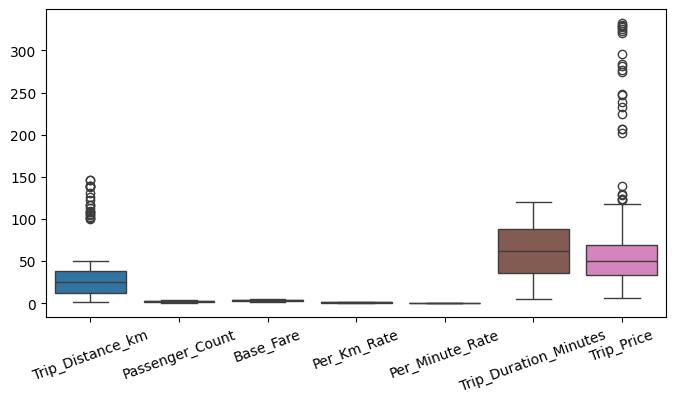

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,4), dpi=100)
plt.xticks(rotation=20)
 
sns.boxplot(df_imputed)

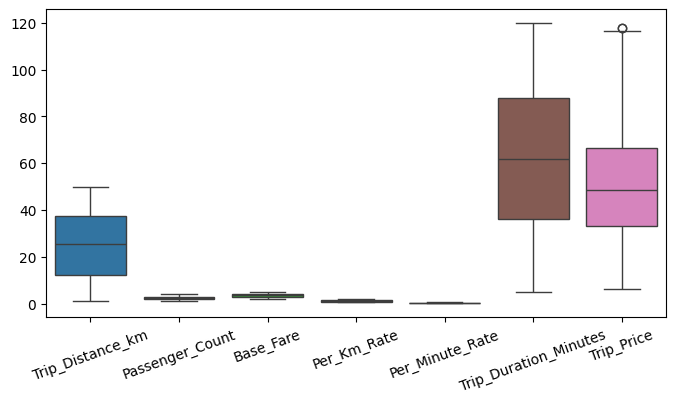

In [28]:
for col in ["Trip_Price", "Trip_Distance_km"]:

    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
        
    df_imputed = df_imputed[
        (df_imputed[col] >= lower_bound) &
        (df_imputed[col] <= upper_bound)
    ]
    
plt.subplots(1, figsize=(8,4), dpi=100)
plt.xticks(rotation=20)
sns.boxplot(df_imputed);

In [29]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 950
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       925 non-null    float64
 1   Passenger_Count        925 non-null    float64
 2   Base_Fare              925 non-null    float64
 3   Per_Km_Rate            925 non-null    float64
 4   Per_Minute_Rate        925 non-null    float64
 5   Trip_Duration_Minutes  925 non-null    float64
 6   Trip_Price             925 non-null    float64
dtypes: float64(7)
memory usage: 57.8 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,925.0,24.994422,13.948933,1.2300,12.860,25.830000,36.870,49.9900
Passenger_Count,925.0,2.462703,1.075083,1.0000,2.000,2.000000,3.000,4.0000
Base_Fare,925.0,3.494550,0.844576,2.0100,2.760,3.502989,4.170,5.0000
Per_Km_Rate,925.0,1.223470,0.417137,0.5000,0.870,1.220000,1.560,2.0000
Per_Minute_Rate,925.0,0.293767,0.112695,0.1000,0.200,0.292916,0.390,0.5000
Trip_Duration_Minutes,925.0,61.785038,31.609168,5.0100,36.560,61.860000,87.740,119.8400
Trip_Price,925.0,51.690386,23.376955,6.1269,33.344,48.449600,66.581,118.0321


In [31]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,925.0,24.978405,14.238492,1.2300,12.230,25.2800,37.630,49.9900
Passenger_Count,925.0,2.486065,1.071947,1.0000,2.000,2.5300,3.000,4.0000
Base_Fare,925.0,3.491401,0.846973,2.0100,2.760,3.4990,4.170,5.0000
Per_Km_Rate,925.0,1.222826,0.422518,0.5000,0.860,1.2100,1.570,2.0000
Per_Minute_Rate,925.0,0.294109,0.113954,0.1000,0.190,0.2900,0.390,0.5000
Trip_Duration_Minutes,925.0,61.882060,31.893723,5.0100,36.050,61.7900,87.900,119.8400
Trip_Price,925.0,51.690386,23.376955,6.1269,33.344,48.4496,66.581,118.0321


In [32]:
(df_imputed.describe().T - df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,0.0,-0.016017,0.289559,0.0,-0.63,-0.550000,0.76,0.0
Passenger_Count,0.0,0.023362,-0.003136,0.0,0.00,0.530000,0.00,0.0
Base_Fare,0.0,-0.003149,0.002397,0.0,0.00,-0.003989,0.00,0.0
Per_Km_Rate,0.0,-0.000644,0.005382,0.0,-0.01,-0.010000,0.01,0.0
Per_Minute_Rate,0.0,0.000342,0.001259,0.0,-0.01,-0.002916,0.00,0.0
Trip_Duration_Minutes,0.0,0.097022,0.284556,0.0,-0.51,-0.070000,0.16,0.0
Trip_Price,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0


In [33]:
from model_testing import test_models

target = "Trip_Price"

imputed = test_models(df_imputed, target)

original = test_models(df, target)

imputed

c:\Users\organ\Repos\ai_ml\taxi-prediction-fullstack-pontus\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
c:\Users\organ\Repos\ai_ml\taxi-prediction-fullstack-pontus\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


,model,scaler,mae,mse,rmse,rmse_%,r2_score
0,LinearRegression,None,5.953447,56.679899,7.528605,0.153067,0.885339
1,LinearRegression,MinMaxScaler,5.953447,56.679899,7.528605,0.153067,0.885339
2,RandomForestRegressor,None,3.609943,22.335677,4.726064,0.096088,0.954816
3,RandomForestRegressor,MinMaxScaler,3.612242,23.282158,4.825159,0.098102,0.952901
4,KNeighborsRegressor,None,11.003850,196.407000,14.014528,0.284935,0.602677
5,KNeighborsRegressor,MinMaxScaler,5.516973,56.596368,7.523056,0.152954,0.885508
6,XGBRegressor,None,3.571514,24.221331,4.921517,0.100061,0.951001
7,XGBRegressor,MinMaxScaler,3.571514,24.221331,4.921517,0.100061,0.951001
8,RidgeCV,None,5.950872,56.607046,7.523765,0.152969,0.885486
9,RidgeCV,MinMaxScaler,5.951405,56.638261,7.525840,0.153011,0.885423


In [36]:
imputed.sort_values(by="rmse_%")

,model,scaler,mae,mse,rmse,rmse_%,r2_score
2,RandomForestRegressor,None,3.609943,22.335677,4.726064,0.096088,0.954816
3,RandomForestRegressor,MinMaxScaler,3.612242,23.282158,4.825159,0.098102,0.952901
6,XGBRegressor,None,3.571514,24.221331,4.921517,0.100061,0.951001
7,XGBRegressor,MinMaxScaler,3.571514,24.221331,4.921517,0.100061,0.951001
5,KNeighborsRegressor,MinMaxScaler,5.516973,56.596368,7.523056,0.152954,0.885508
8,RidgeCV,None,5.950872,56.607046,7.523765,0.152969,0.885486
9,RidgeCV,MinMaxScaler,5.951405,56.638261,7.525840,0.153011,0.885423
1,LinearRegression,MinMaxScaler,5.953447,56.679899,7.528605,0.153067,0.885339
0,LinearRegression,None,5.953447,56.679899,7.528605,0.153067,0.885339
11,ElasticNetCV,MinMaxScaler,5.954728,56.805970,7.536974,0.153237,0.885084


In [35]:
original.sort_values(by="rmse_%")

,model,scaler,mae,mse,rmse,rmse_%,r2_score
3,RandomForestRegressor,MinMaxScaler,4.465347,42.940585,6.552907,0.133230,0.913133
2,RandomForestRegressor,None,4.485003,46.071039,6.787565,0.138001,0.906800
6,XGBRegressor,None,5.205549,52.607471,7.253101,0.147466,0.893577
7,XGBRegressor,MinMaxScaler,5.205549,52.607471,7.253101,0.147466,0.893577
8,RidgeCV,None,6.485292,69.901026,8.360683,0.169985,0.858593
9,RidgeCV,MinMaxScaler,6.483583,69.914459,8.361487,0.170001,0.858566
0,LinearRegression,None,6.485047,69.957001,8.364030,0.170053,0.858480
1,LinearRegression,MinMaxScaler,6.485047,69.957001,8.364030,0.170053,0.858480
11,ElasticNetCV,MinMaxScaler,6.512725,70.109241,8.373126,0.170238,0.858172
5,KNeighborsRegressor,MinMaxScaler,7.230217,88.991479,9.433530,0.191797,0.819974


In [37]:
df_imputed.to_csv("../src/taxipred/data/cleaned_taxi_data.csv")